### IMDB - 쇼생크 탈출(1994) User reviews

In [2]:
import time
import warnings
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

warnings.filterwarnings('ignore')

In [3]:
base_url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
url = base_url
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)

- "Load More" 버튼을 24회 눌러서 총 1000건의 데이터가 보이게 하기

In [4]:
for i in range(3):
    driver.find_element(By.ID, 'load-more-trigger').click()
    time.sleep(3)

- 글 내용을 펼치는 아이콘 누르기
    - 스포일러(class="expander-icon-wrapper spoiler-warning__control")
    - 긴 글(class="expander-icon-wrapper show-more__control")

In [5]:
divs = driver.find_elements(By.CSS_SELECTOR, '.lister-item.mode-detail.imdb-user-review')
count = 0
for div in divs:
    try:
        div.find_element(By.CSS_SELECTOR, '.expander-icon-wrapper').click()
        time.sleep(1)
        count += 1
    except:
        continue

In [6]:
len(divs), count

(100, 57)

- 화면이 모두 펼쳐지면 BeautifulSoup으로 크롤링

In [7]:
soup = BeautifulSoup(driver.page_source, 'html.parser') 
divs = soup.select('.lister-list > div')
len(divs)

100

In [8]:
driver.close()

In [9]:
div = divs[0]
score = div.select_one('.rating-other-user-rating > span').get_text().strip()
score       # 값이 지정되지 않은 글도 있음

'10'

In [10]:
title = div.select_one('.title').get_text().strip() 
title

"Some birds aren't meant to be caged."

In [11]:
content = div.select_one('.text.show-more__control').get_text().strip() 
content

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

- 모든 데이터 수집하기

In [12]:
score_list, title_list, content_list = [], [], []
for i, div in enumerate(divs):
    try:
        score = div.select_one('.rating-other-user-rating > span').get_text().strip()
        score_list.append(float(score))
    except:
        score_list.append(np.nan)   # 값이 없으면 결측치로 만듦
        #print(i, end=' ')

    title = div.select_one('.title').get_text().strip()
    content = div.select_one('.text.show-more__control').get_text().strip()
    title_list.append(title)
    content_list.append(content)

In [13]:
len(score_list), len(title_list), len(content_list)

(100, 100, 100)

In [21]:
df = pd.DataFrame({
    'score':score_list, 'title':title_list, 'content':content_list
})
df.head(15)

,score,title,content
0,10.0,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...
1,10.0,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...
2,10.0,Don't Rent Shawshank.,I'm trying to save you money; this is the last...
3,10.0,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...
4,10.0,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt..."
5,10.0,The Shawshank Redemption,One of the finest films made in recent years. ...
6,10.0,"Enthralling, fantastic, intriguing, truly rema...",Shawshank Redemption is without doubt one of t...
7,10.0,Stephen King's best adapted movie,Misery and Stand By Me were the best adaptatio...
8,10.0,Eternal Hope,I've lost count of the number of times I have ...
9,10.0,IMDb and the Greatest Film of All Time,Two imprisoned men (Tim Robbins and Morgan Fre...


In [15]:
df.score.mean(), df.score.min(), df.score.max()

(9.659090909090908, 7.0, 10.0)

- Word Cloud 만들기

In [16]:
reviews = ''
for i in df.index:
    reviews += df.title[i] + '\n' + df.content[i] + '\n'

In [17]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [18]:
sw_wc = STOPWORDS
wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc
    ).generate(reviews)

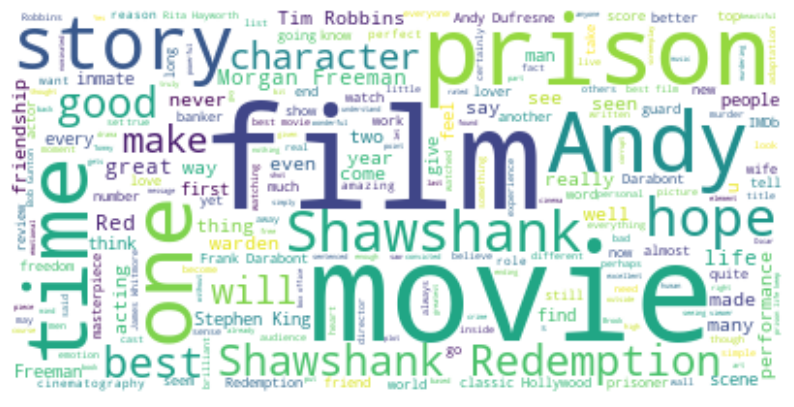

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [20]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

film:	1.0
movie:	0.9042553191489362
prison:	0.5851063829787234
time:	0.46808510638297873
Andy:	0.450354609929078
one:	0.44680851063829785
story:	0.35815602836879434
Shawshank:	0.3120567375886525
hope:	0.29432624113475175
Shawshank Redemption:	0.24113475177304963
